In [51]:
import requests
import json
import numpy as np
import api_keys
import pandas as pd

from citipy import citipy

lat_range = (-90, 90)
lng_range = (-180, 180)

In [52]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = list(zip(lats, lngs))
cities = []

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

len(cities)

635

In [53]:
print('Beginning Data Retrieval')
print('------------------------')

city_data = []
for i,city in enumerate(cities):
    url = 'https://api.openweathermap.org/data/2.5/weather?q={}&appid=d4681daa78c5651b1128b2b0abd11a84&units=imperial'.format(city)
    resp = requests.get(url).json()
    if resp.get('message') == 'city not found':
        print('City not found. Skipping...')
    else:
        city_data.append(resp)
        print('Processing Record {} | {}'.format(i+1,city))

print('------------------------')        
print('Data Retrieval Complete')
print('------------------------')

Beginning Data Retrieval
------------------------
City not found. Skipping...
Processing Record 2 | san felipe
Processing Record 3 | ushuaia
Processing Record 4 | tiksi
Processing Record 5 | singida
Processing Record 6 | kaitangata
Processing Record 7 | ponta do sol
Processing Record 8 | tumbi
Processing Record 9 | hobart
Processing Record 10 | qaanaaq
Processing Record 11 | kota belud
Processing Record 12 | talnakh
Processing Record 13 | fairbanks
Processing Record 14 | kapaa
City not found. Skipping...
Processing Record 16 | benghazi
Processing Record 17 | matara
Processing Record 18 | souillac
Processing Record 19 | tasiilaq
Processing Record 20 | harper
Processing Record 21 | kahului
Processing Record 22 | itupiranga
Processing Record 23 | praia
Processing Record 24 | necochea
Processing Record 25 | tshane
Processing Record 26 | rikitea
Processing Record 27 | ribeira grande
Processing Record 28 | puerto ayora
Processing Record 29 | cape town
Processing Record 30 | mayo
Processing R

Processing Record 253 | camacha
Processing Record 254 | chulym
Processing Record 255 | christchurch
City not found. Skipping...
Processing Record 257 | ginir
Processing Record 258 | lorengau
Processing Record 259 | thunder bay
Processing Record 260 | khatanga
City not found. Skipping...
Processing Record 262 | caluquembe
Processing Record 263 | mbulu
City not found. Skipping...
Processing Record 265 | deputatskiy
Processing Record 266 | aksarka
Processing Record 267 | planadas
Processing Record 268 | buckeye
Processing Record 269 | dryden
City not found. Skipping...
Processing Record 271 | poltavka
Processing Record 272 | shagonar
Processing Record 273 | tairua
City not found. Skipping...
Processing Record 275 | rensvik
City not found. Skipping...
Processing Record 277 | miedzyrzec podlaski
Processing Record 278 | saint-augustin
Processing Record 279 | ayagoz
Processing Record 280 | bonthe
Processing Record 281 | baykit
Processing Record 282 | maumere
City not found. Skipping...
Proces

Processing Record 504 | hervey bay
Processing Record 505 | jackson
Processing Record 506 | tokur
City not found. Skipping...
Processing Record 508 | wasilla
Processing Record 509 | bonavista
Processing Record 510 | nantucket
Processing Record 511 | barcelona
Processing Record 512 | zhoucheng
Processing Record 513 | mananjary
Processing Record 514 | tezu
Processing Record 515 | reconquista
Processing Record 516 | lagoa
Processing Record 517 | rawson
Processing Record 518 | san matias
Processing Record 519 | praia da vitoria
Processing Record 520 | alice springs
Processing Record 521 | sola
Processing Record 522 | la peca
Processing Record 523 | belin
Processing Record 524 | nanakuli
Processing Record 525 | san joaquin
Processing Record 526 | akalgarh
Processing Record 527 | yaan
Processing Record 528 | jalu
Processing Record 529 | ostrovnoy
Processing Record 530 | nizhnevartovsk
Processing Record 531 | umba
Processing Record 532 | gravelbourg
Processing Record 533 | manaia
Processing Re

In [54]:
import csv

with open('output_data_cities.csv', 'w') as f:
    writer = csv.writer(f,lineterminator='\n')
    writer.writerow(city_data)

In [55]:
city_data[1]

{'coord': {'lon': -68.31, 'lat': -54.81},
 'weather': [{'id': 300,
   'main': 'Drizzle',
   'description': 'light intensity drizzle',
   'icon': '09d'}],
 'base': 'stations',
 'main': {'temp': 48.2,
  'pressure': 1000,
  'humidity': 61,
  'temp_min': 48.2,
  'temp_max': 48.2},
 'visibility': 10000,
 'wind': {'speed': 31.09, 'deg': 230, 'gust': 18},
 'clouds': {'all': 75},
 'dt': 1547420400,
 'sys': {'type': 1,
  'id': 8303,
  'message': 0.0034,
  'country': 'AR',
  'sunrise': 1547367605,
  'sunset': 1547427805},
 'id': 3833367,
 'name': 'Ushuaia',
 'cod': 200}

In [59]:
df = pd.DataFrame.from_records(city_data)
df_1 = df[['clouds','coord','dt','main','name','sys','wind']]
df_1.shape

(564, 7)

In [60]:
import warnings
warnings.filterwarnings('ignore')

df_1['Cloudiness'] = df['clouds'].map(lambda x: x.get('all'))
df_1['Lng'] = df['coord'].map(lambda x: x.get('lon'))
df_1['Lat'] = df['coord'].map(lambda x: x.get('lat'))
df_1['Max Temp'] = df['main'].map(lambda x: x.get('temp_max'))
df_1['Humidity'] = df['main'].map(lambda x: x.get('humidity'))
df_1['Country'] = df['sys'].map(lambda x: x.get('country'))
df_1['Wind Speed'] = df['wind'].map(lambda x: x.get('speed'))
df_1 = df_1[['name','Cloudiness','Country','dt','Humidity','Lat','Lng','Max Temp', 'Wind Speed']]
df_1 = df_1.rename(columns={'name':'City','dt':'Date'})

In [79]:
from datetime import datetime
def convert_data(d):
    ts = int(d)
    return datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
    
df_1['Converted_Date'] = df_1['Date'].map(convert_data)
df_1.head(15)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Converted_Date
0,San Felipe,76,CL,1547423437,74,-32.75,-70.73,59.95,1.63,2019-01-13 23:50:37
1,Ushuaia,75,AR,1547420400,61,-54.81,-68.31,48.20,31.09,2019-01-13 23:00:00
2,Tiksi,0,RU,1547423438,0,71.64,128.87,-38.42,2.42,2019-01-13 23:50:38
3,Singida,0,TZ,1547423439,99,-4.82,34.75,55.90,2.86,2019-01-13 23:50:39
4,Kaitangata,92,NZ,1547423440,86,-46.28,169.85,57.43,15.05,2019-01-13 23:50:40
5,Ponta do Sol,20,BR,1547423441,86,-20.63,-46.00,72.33,1.86,2019-01-13 23:50:41
6,Tumbi,24,NG,1547423441,93,7.50,4.30,70.17,3.76,2019-01-13 23:50:41
7,Hobart,0,AU,1547422200,46,-42.88,147.33,71.60,10.29,2019-01-13 23:30:00
8,Qaanaaq,0,GL,1547423442,100,77.48,-69.36,-25.73,9.91,2019-01-13 23:50:42
9,Kota Belud,75,MY,1547422200,83,6.35,116.43,78.80,4.70,2019-01-13 23:30:00


#### Latitude vs. Temperature Plot

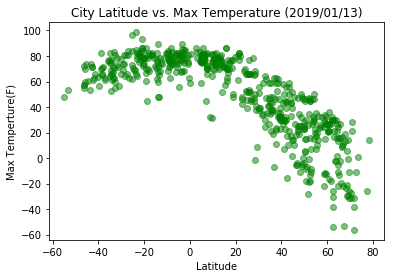

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df_1['Lat'], df_1['Max Temp'], c="g", alpha=0.5, marker='o')
plt.title("City Latitude vs. Max Temperature (2019/01/13)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperture(F)")
plt.savefig("City Latitude vs. Max Temperature (20190113).png")

#### Latitude vs. Humidity Plot

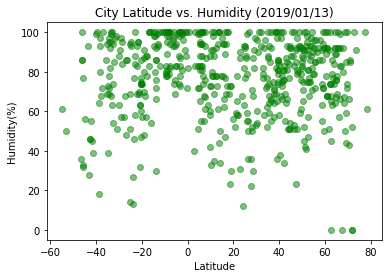

In [90]:
plt.scatter(df_1['Lat'], df_1['Humidity'], c="g", alpha=0.5, marker='o')
plt.title("City Latitude vs. Humidity (2019/01/13)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("City Latitude vs. Humidity (20190113).png")

#### Latitude vs. Cloudiness Plot

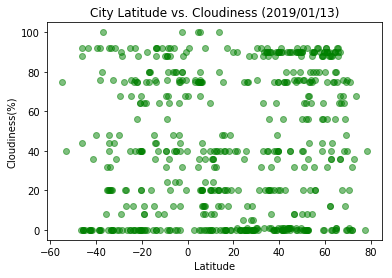

In [91]:
plt.scatter(df_1['Lat'], df_1['Cloudiness'], c="g", alpha=0.5, marker='o')
plt.title("City Latitude vs. Cloudiness (2019/01/13)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig("City Latitude vs. Cloudiness (20190113).png")

#### Latitude vs. Wind Speed Plot

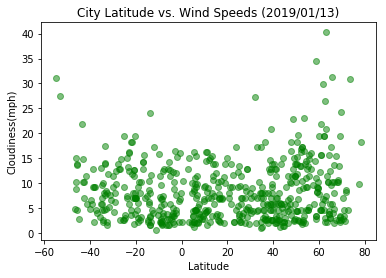

In [92]:
plt.scatter(df_1['Lat'], df_1['Wind Speed'], c="g", alpha=0.5, marker='o')
plt.title("City Latitude vs. Wind Speeds (2019/01/13)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(mph)")
plt.savefig("City Latitude vs. Wind Speeds (20190113).png")

## Data Analysis

1) As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude).In addition, the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This makes sense because in January, southern hemisphere is in summer while the northern hemisphere is in winter.

2) There is no strong relationship between latitude and Humidity. However, it is interesting to see that the humidity for cities aournd the equator were above 60%.

3) There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.